<a href="https://colab.research.google.com/github/PabloPoche/api_service_python/blob/master/1_weight_height.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicios de Regresión

Ejemplo de regresión utilizando el dataset recolecado de pesos y estaturas de personas<br>

[Dataset source](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
if os.access('weight_height.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv > weight_height.csv
    else:
        !wget weight_height.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv

--2023-03-03 01:49:04--  http://weight_height.csv/
Resolving weight_height.csv (weight_height.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘weight_height.csv’
--2023-03-03 01:49:04--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428122 (418K) [text/plain]
Saving to: ‘weight_height.csv’

weight_height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.04s   

2023-03-03 01:49:04 (11.4 MB/s) - ‘weight_height.csv’ saved [428122/428122]

FINISHED --2023-03-03 01:49:04--
Total wall clock time: 0.3s
Downloaded: 1 files, 418K in 0.04s (11.4 MB/s)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [3]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df = pd.read_csv("weight_height.csv")
df.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [4]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes
df_clean = df.copy()
df_clean.dropna(subset=['Height'], inplace=True)
df_clean.dropna(subset=['Weight'], inplace=True)

In [5]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df_clean.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [6]:
# Alumno: copie los datos a un nuevo dataset (df2), pero ahora transforme las columnas en 
# peso --> proveniente de Weight, debe pasar de libras a kilobramos
# altura --> proveniente de Height, debe pasar de pulgadas a metros
# sexo --> masculino (proveniente de Male) y femenino (proveniente de Female)
df2 = df_clean.copy()
df2.columns = ['sexo', 'altura', 'peso']
df2['sexo'] = df2.apply(lambda x: 'masculino' if x['sexo'] == 'Male' else 'femenino' , axis=1)
df2['altura'] = df2.apply(lambda x: x['altura'] * 0.0254 , axis=1)
df2['peso'] = df2.apply(lambda x: x['peso'] * 0.453592 , axis=1)



In [7]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar
print('Quedan', df2.shape[0], 'filas para analizar.')

Quedan 10000 filas para analizar.


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

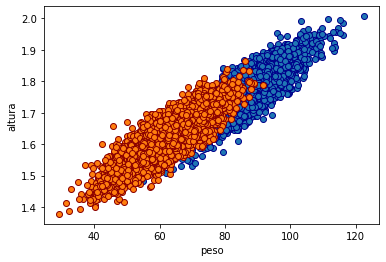

In [11]:
# Alumno graficar el peso (y) en función de la altura (x) pero para ambos sexos por separados
# Se debe realizar todo en un mismo "ax", cada scatter plot con diferente color para ver los dos grupos
df_masculino = df2[df2['sexo'] == 'masculino']
df_femenino = df2[df2['sexo'] == 'femenino']
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(df_masculino['peso'], df_masculino['altura'], edgecolors='darkBlue', label='masculino')
ax.scatter(df_femenino['peso'], df_femenino['altura'], edgecolors='darkRed', label='femenino')
ax.set_xlabel('peso')
ax.set_ylabel('altura')
plt.show()


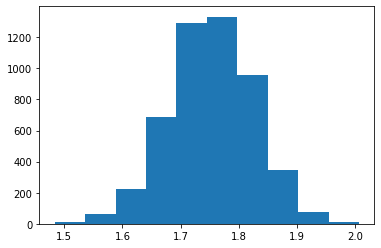

La altura promedio de los Hombres es de: 1.7532691860179221


In [17]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio
plt.hist(df_masculino['altura'])
plt.show()
print("La altura promedio de los Hombres es de:", df_masculino['altura'].mean())


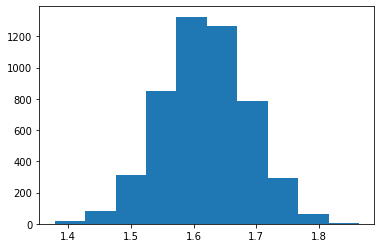

La altura promedio de las Mujeres es de: 1.6182028495269967


In [18]:
# Alumno: Dibujar la distribucion (histograma) de la altura en mujeres
# Además, imprimir en pantalla el valor medio
plt.hist(df_femenino['altura'])
plt.show()
print("La altura promedio de las Mujeres es de:", df_femenino['altura'].mean())


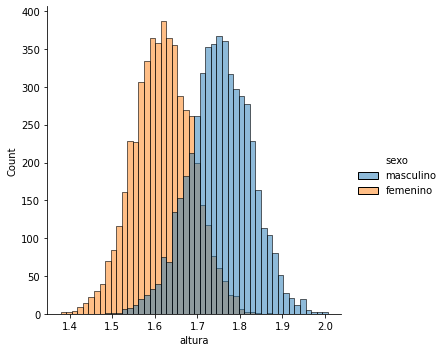

In [16]:
# Alumno: porque no prueba la función displot de seaborn que acepta
# "colorear" según la categoría deseada.
# Ingresar parámetros= data=df2, x="altura", hue="sexo"
sns.displot(data=df2, x="altura", hue="sexo")
plt.show()

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Alumno:<br>
Para esta regresión se utilizará como variable de entrada el peso (X) y como salida la altura (y). Crear el modelo de regresión lineal que sea de su agrado o invierta las variables de salida y entrada si así lo prefiere. Debe elegir trabajar con los datos de sexo masculino o femenino, o duplicar el trabajo y realizar ambos.<br>
Pasor a seguir:
- Obtener las variables X e y (para masculino y/o femenino)
- Dividir el dataset en train y test 70%30%
- Entrenar un modelo de regresión
- Calcular la métrica r2_score del modelo (y_hat vs y_test)
- Dibujar el resultado de la regresion sobre los datos de entrada


In [32]:
X_m = df_masculino[['peso']].values
y_m = df_masculino['altura'].values


In [33]:
from sklearn.model_selection import train_test_split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, test_size=0.3, random_state=42)

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_m, y_train_m)
y_hat_m= lr.predict(X_test_m)

In [63]:
X_f = df_femenino[['peso']].values
y_f = df_femenino['altura'].values
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train_f, y_train_f)
y_hat_f= lr.predict(X_test_f)


# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [64]:
from sklearn.metrics import r2_score
value_m = r2_score(y_test_m, y_hat_m)
value_f = r2_score(y_test_f, y_hat_f)
print("Coeficiente de determinación para hombres:", value_m)
print("Coeficiente de determinación para mujeres:", value_f)


Coeficiente de determinación para hombres: 0.747164278610827
Coeficiente de determinación para mujeres: 0.7309362868994915


# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

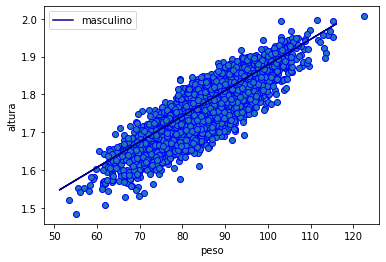

In [65]:
x_test = X_test_m
y_test = lr.predict(X_test_m)

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x_test, y_test, label="masculino", color='darkBlue')
ax.scatter(X_train_m, y_train_m, edgecolor='b')
ax.set_xlabel("peso")
ax.set_ylabel("altura")
ax.legend()
plt.show()

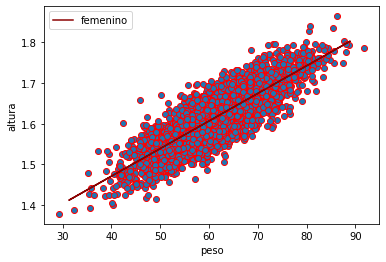

In [66]:
x_test = X_test_f
y_test = lr.predict(X_test_f)

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x_test, y_test, label="femenino", color='darkRed')
ax.scatter(X_train_f, y_train_f, edgecolor='r')
ax.set_xlabel("peso")
ax.set_ylabel("altura")
ax.legend()
plt.show()